In [5]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Define the problem

**Given**: set of individuals heights and weights, labeled as 'Adult' and 'Child'  
    40 children -> Gaussian([120, 50], [[90,10 ],[10, 40]])  
    120 adults -> Gaussian([150, 80], [[60, 10],[10, 40]])  

**Goal**: Fit a naive Bayesian Classifier, to classify next data:
    [[180,90],[110,20], [130, 60]]

## Prepare the data (Data Preprocessing)

### Load the data

In [6]:
# gen X
np.random.seed(1111)
children = np.random.multivariate_normal([120, 40], [[90,10],[10,60]], size=40)
adults   = np.random.multivariate_normal([150, 80], [[60,10],[10,60]], size=120)

X = np.concatenate((children ,adults),axis=0)

# gen y
y1 = np.zeros(len(children), dtype="int8")
y2 = np.ones(len(adults), dtype="int8")
y = np.concatenate((y1,y2),axis=0)

print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')

X.shape: (160, 2)
y.shape: (160,)


### Get insight of the data (Prepare and clean)

In [7]:
df = pd.DataFrame({
    'height': X[:,0].round(decimals=2),
    'weight': X[:,1].round(decimals=2),
    'y': y
})
df

,height,weight,y
0,134.35,35.88,0
1,114.63,31.45,0
2,106.19,35.63,0
3,119.57,32.25,0
4,135.03,42.95,0
...,...,...,...
155,132.74,66.59,1
156,138.10,81.29,1
157,153.90,81.21,1
158,142.25,73.74,1


#### Clean

No need

#### Visualize with Seaborn

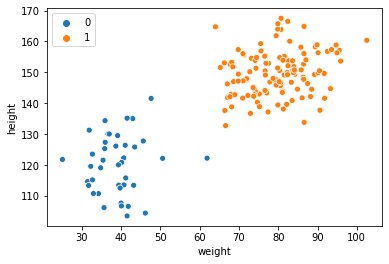

In [8]:
ax = sns.scatterplot(x=df.weight, y=df.height, hue=y)

## Select features

## Separate the training data from the test data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(f'X_train: {X_train[:5]}\n', f'y_train: {y_train[:5]}\n')
print(f'X_test: {X_test[:5]}\n', f'y_test: {y_test[:5]}\n')

X_train: [[112.53336629  39.71592834]
 [137.7214765   90.6210102 ]
 [164.72618143  64.00227085]
 [167.51314766  80.72205188]
 [143.48028269  81.02752222]]
 y_train: [0 1 1 1 1]

X_test: [[151.57051057  65.21773724]
 [150.17877137  72.76364532]
 [141.72004313  86.07155122]
 [155.17323652  81.53215874]
 [150.69980063  83.72127545]]
 y_test: [1 1 1 1 1]



##  Choose the model

TASK: continue with next steps alone, using the appropriate Naive Bayes algorithm from sklearn.naive_bayes

## Train the model (fit the model)

In [11]:
cls = GaussianNB()
cls.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Predict (classify unknown input sample)

In [12]:
y_pred = cls.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int8)

## Evaluate the model

Check the Precision and recall of the system

In [23]:
from sklearn.metrics import classification_report

res = y_pred == y_test

# HW: print result as percentage

l = res.shape[0]

true_count = res.sum(where=True)

false_count = l - true_count


# 1% = 0.01
evaluation = true_count/l
evaluation



0.975

In [24]:
print(classification_report(y_test, y_pred, target_names=['children', 'adults']))

              precision    recall  f1-score   support

    children       1.00      0.91      0.95        11
      adults       0.97      1.00      0.98        29

    accuracy                           0.97        40
   macro avg       0.98      0.95      0.97        40
weighted avg       0.98      0.97      0.97        40

